<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/3_Klasyfikacja/2_K_najblizszych_sasiadow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###K najblizszych sasiadow
1. [Import bibliotek](#a1)
2. [Wczytanie danych](#2)
3. [Wykres Rozproszenia](#a3)
2. [K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów](#3)
5. [Wykres granic decyzyjnych](#a5)

### <a name='a1'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)
sns.set(font_scale=1.3)

### <a name='2'></a> Wczytanie danych

In [ ]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(data[:5])
print(f'\n{target[:5]}')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0]


In [ ]:
all_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(data=np.c_[data, target], columns=all_data['feature_names'] + ['class'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

### <a name='a3'></a> Wykres Rozproszenia

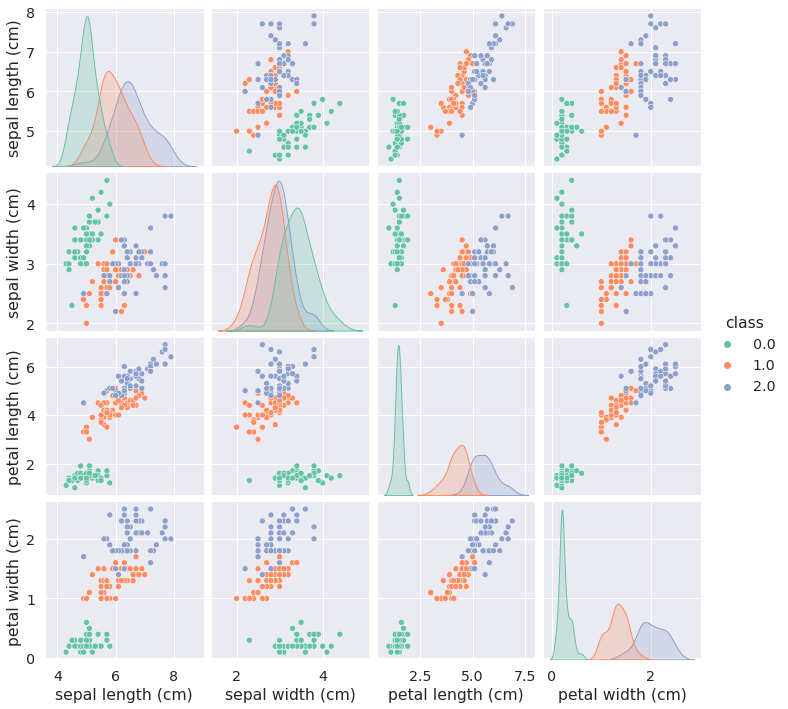

In [ ]:
wykres = sns.pairplot(df, vars=all_data['feature_names'], hue='class', palette='Set2')

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
data = data[:, :2]

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (150, 2)
target shape: (150,)


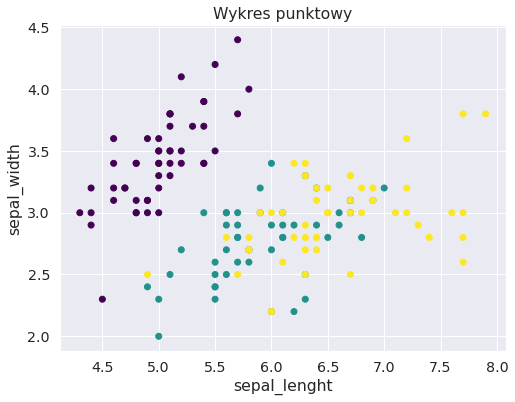

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('sepal_lenght')
plt.ylabel('sepal_width')
plt.show()

In [ ]:
df = pd.DataFrame(data=np.c_[data, target], columns=('sepal_lenght', 'sepal_width', 'class'))
px.scatter(df, x='sepal_lenght', y='sepal_width', color='class', width=800)

### <a name='3'></a> K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów

Podstawą działania algorytmu jest:
* znalezienie z góry określonej liczby próbek treningowych znajdujących się najbliżej naszej obserwacji 
* przewidzenie na ich podstawie etykiety

Liczba sąsiadów jest określana przez użytkownika. Odległości zwykle kalkuluje sie przy pomocy metryki euklidesowej.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### <a name='a5'></a> Wykres granic decyzyjnych

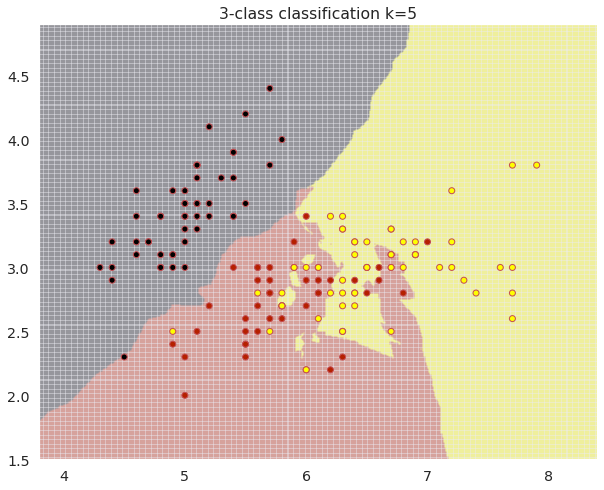

In [ ]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')
plt.show()

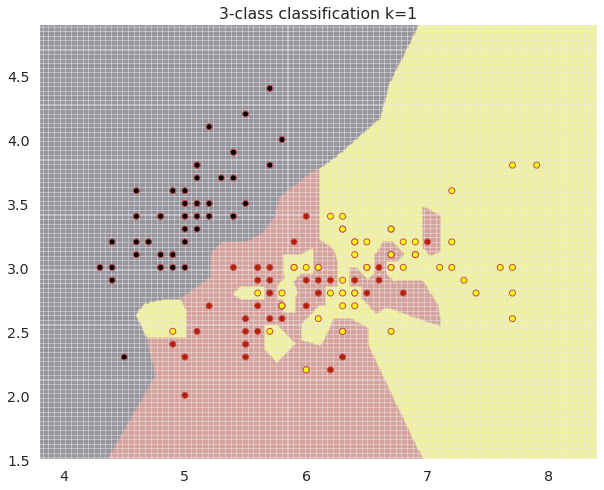

In [ ]:
 def plot_decision_boundries(n_neighbors=1):
     
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(data, target)

    x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={n_neighbors}')
    plt.show()

plot_decision_boundries()

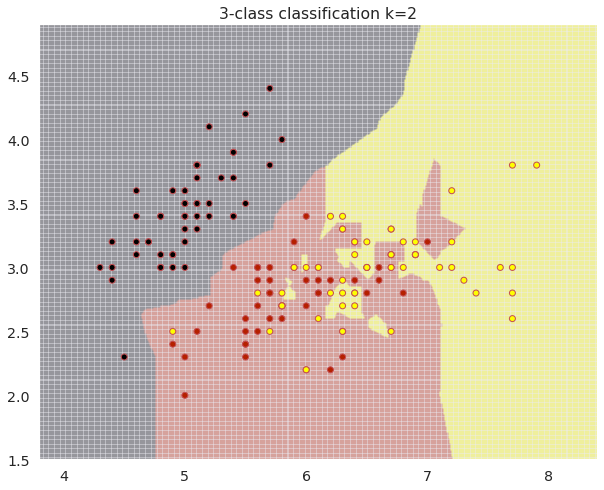

In [ ]:
plot_decision_boundries(2)

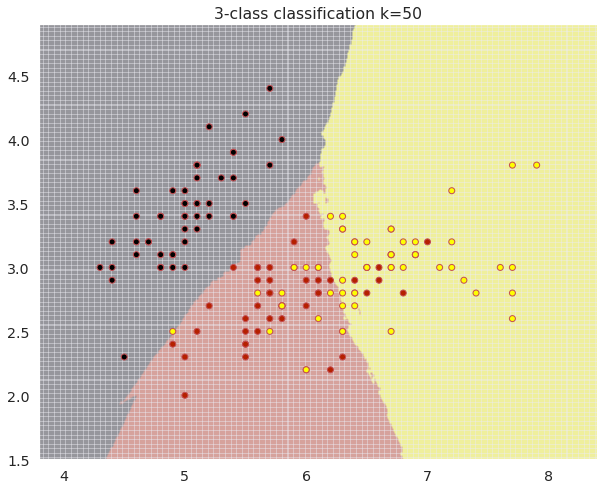

In [ ]:
plot_decision_boundries(50)

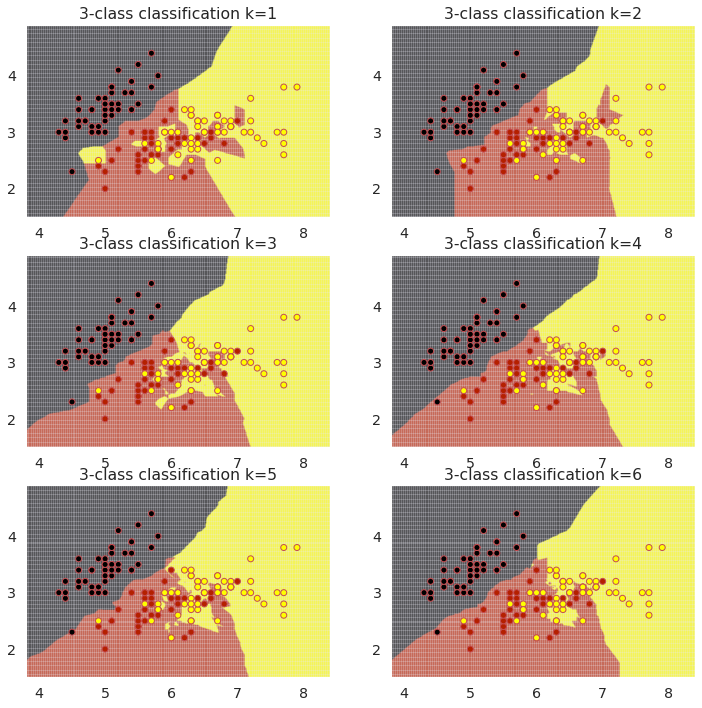

In [32]:
plt.figure(figsize=(12, 12))

for i in range(1, 7):
    plt.subplot(3, 2, i)

    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(data, target)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}')

plt.show()